# ThreeProng Strategy Simulation

In [1]:
import sys
import os

import yaml

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory of the current working directory
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))

# Add the parent directory to the search path
sys.path.append(parent_dir)

In [2]:
from analysis.simulation import Simulation
from core import SimulatedMarket, GeminiMarket
from strategies import ThreeProngAlt
from analysis.plot import Plotter

## Setup Simulation

In [3]:
from yaml import safe_load
from misc import ROOT

with open(f'{ROOT}/gemini_api.yml', 'r') as f:
    secrets = safe_load(f)

# symbol = "solusd"
symbol = "dogeusd"
# symbol = "ethusd"
# symbol = "btcusd"

mark = GeminiMarket(symbol, secrets['key'], secrets['secret'], auto_update=False)
sim = SimulatedMarket(mark)

Beginning update
Loading data for Gemini
Load complete for Gemini
Fetching candle data for 1m...
Fetching candle data for 5m...
Fetching candle data for 15m...
Fetching candle data for 30m...
Fetching candle data for 1hr...
Fetching candle data for 6hr...
Fetching candle data for 1day...
Beginning save for Gemini
Finished saving Gemini
Update complete for Gemini


In [4]:
# GeminiMarket.fetch_all(secrets['key'], secrets['secret'], ['btcusd', 'ethusd', 'solusd', 'dogeusd'])

## Simulate Strategy

In [9]:
strat = ThreeProngAlt(threshold=.25, capital=1000, market=sim, timeout='2h', freq='5m', lookback=3)
test = Simulation(strat)
test.process_timeframes()
test.strategy.pnl()

Starting simulation
Pre-processing data


/Users/swe/repos/investr/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/Users/swe/repos/investr/venv/lib/python3.10/site-packages/pandas/core/arrays/datetimelike.py:2144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


Beginning to process decision data


/Users/swe/repos/investr/strategies/financials.py:164: UserWarning: `starting` accessed while buying is restricted (`_remaining` == 0)
  warn(msg)


10 completed
20 completed
30 completed
40 completed
50 completed
60 completed
70 completed
80 completed
90 completed
Finished processing data


-679.1799999999998

### Plot

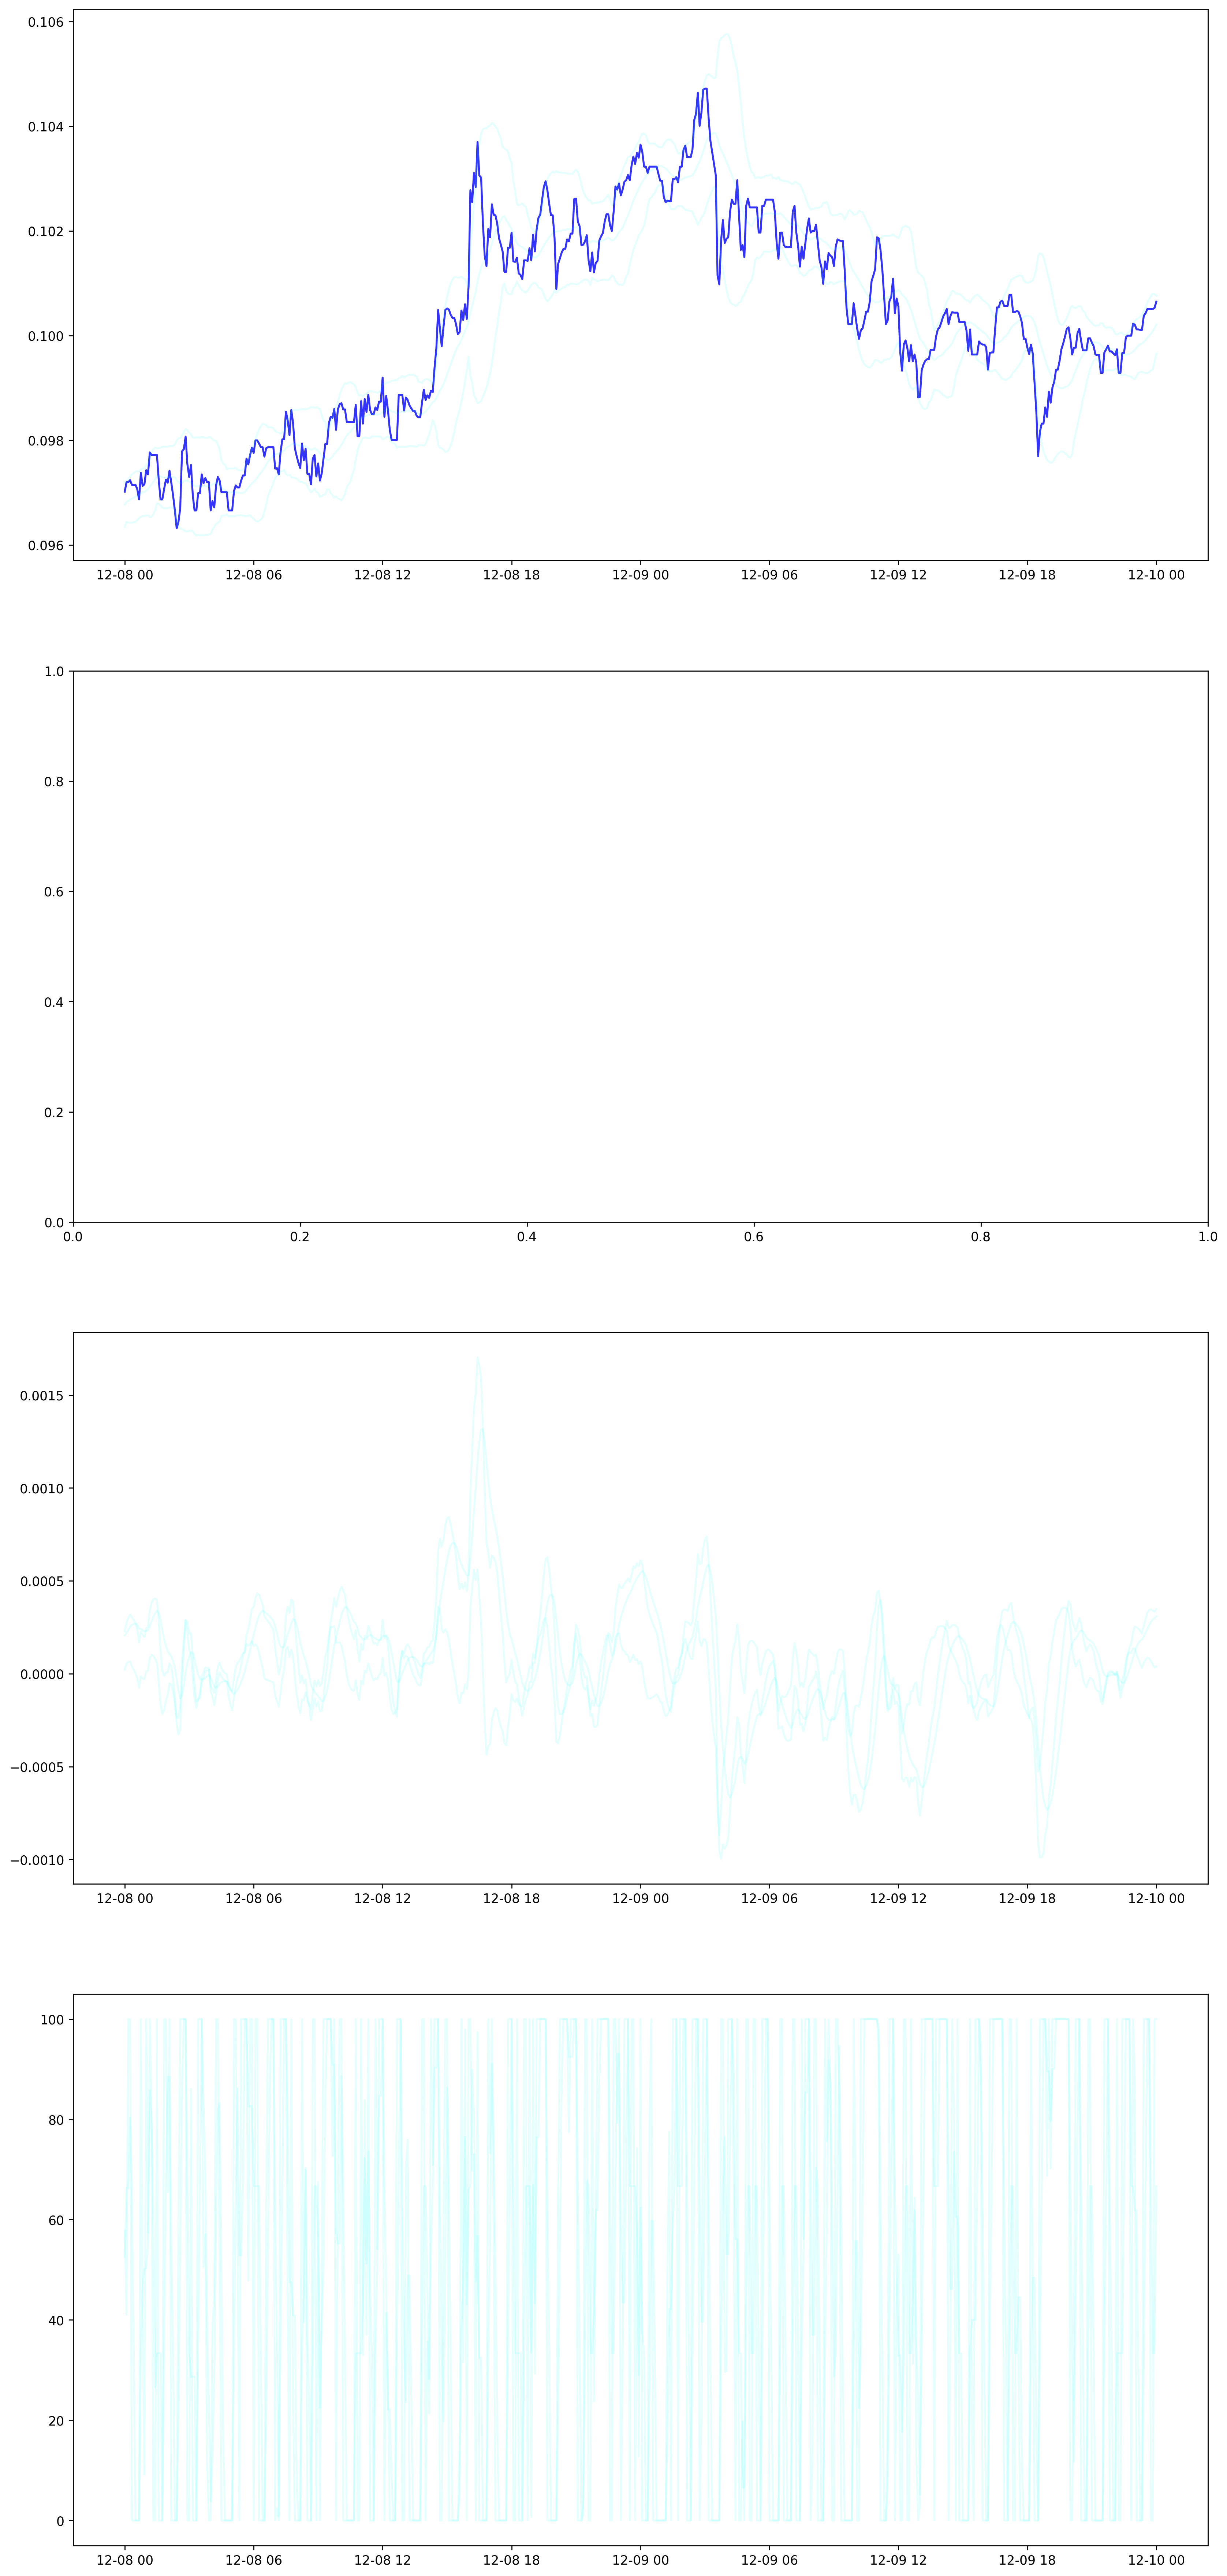

In [13]:
Plotter(strat).plot(start='2023-12-09')